# **0.Introduction**

## **Pima Indians Diabetes Database**

### **About Dataset**

####**Context**
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

####**Content**
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

####**Acknowledgements**
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

####**Inspiration**
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data

# **1.Load Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = 'white', context = 'notebook', palette = 'deep')

import warnings
warnings.filterwarnings('ignore')

# **2.Load and Check Data**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"bonecar","key":"16e8cf29f7ed598055d79be78b65be57"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

pima-indians-diabetes-database.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip pima-indians-diabetes-database.zip

Archive:  pima-indians-diabetes-database.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
# Load data from csv file
df = pd.read_csv('diabetes.csv')

In [7]:
# Print 5 rows of df
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Check data type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
# dataframe shape
df.shape

(768, 9)

 **Data contents:**

* Pregnancies
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI
* DiabetesPedigreeFunction
* Age
* Outcome(Target labels)

Dataframe of Diabetes have (768,9) shape

Diabetes data are composed of 8 features and 1 label(Outcome).

Outcome means whether he/she have diabetes, and is composed of two classes (0 or 1)

In [10]:
# Check Null data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
# Summaries of data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Some data of Glucose, BloodPressure, SkinThickness, Insulin, BMI data have 0 values. This is not make sense. I think these values are missing values.

In [12]:
# feature column names
feature_columns = df.columns[:-1]
feature_columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

* I change 0 values of feature columns without Pregnancies to null values.

In [13]:
# the number of null values
df_null = df[feature_columns[1:]].replace(0, np.nan)
df_null.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

* After change of 0 values to nan, lots of null values are in diabetes data. For SkinThickness and Insulin, there are lots of null values.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Glucose'),
  Text(1, 0, 'BloodPressure'),
  Text(2, 0, 'SkinThickness'),
  Text(3, 0, 'Insulin'),
  Text(4, 0, 'BMI'),
  Text(5, 0, 'DiabetesPedigreeFunction'),
  Text(6, 0, 'Age')])

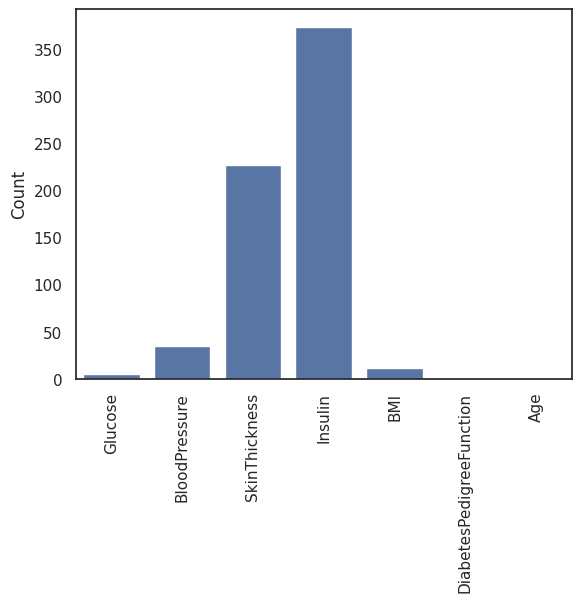

In [14]:
sns.barplot(df_null.isnull().sum())
plt.ylabel('Count')
plt.xticks(rotation = 90)

<Axes: >

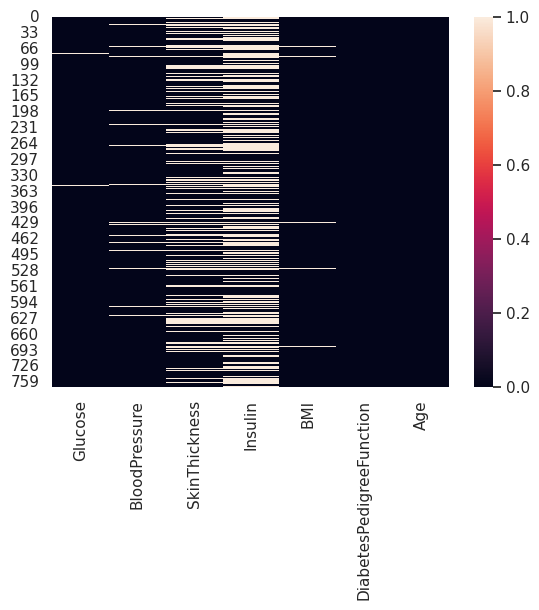

In [15]:
sns.heatmap(df_null.isnull())

* In feature engineering section, I will treat missing values properly to make good model.

# **3. EDA**

## **3.1 Outcome**

<Axes: xlabel='Outcome', ylabel='count'>

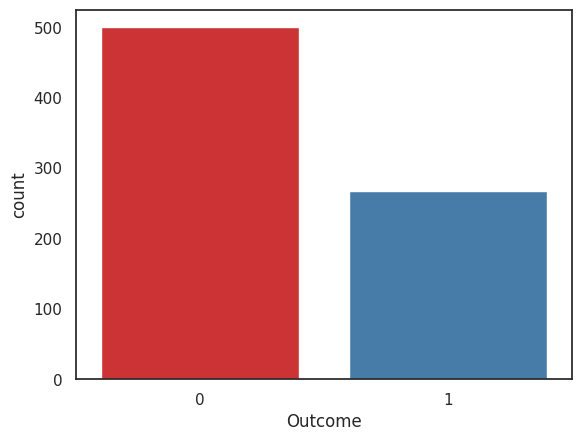

In [16]:
# Outcome countplot
sns.countplot(x = 'Outcome', palette = 'Set1', data=df)

In [17]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [18]:
df['Outcome'].value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

**Observation:**
* The diabetes incidence rate(Outcome == 1) appears to be around 34%, and the ratio of those with and without diabetes appears to be not bad.

## **3.2 Pregnancies**



Text(0.5, 1.0, 'Violinplot: Pregnancies vs Outcome')

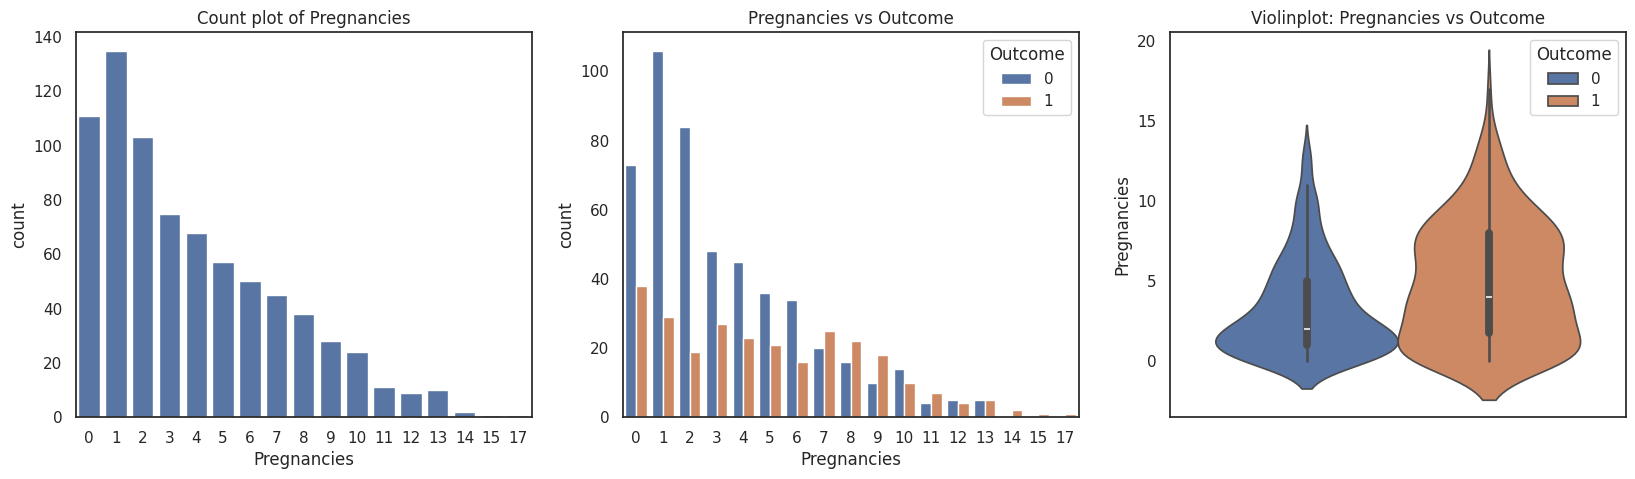

In [19]:
# Pregnancies plot
f, ax = plt.subplots(1,3, figsize = (20,5))
sns.countplot(x='Pregnancies', data = df, ax = ax[0])
ax[0].set_title('Count plot of Pregnancies')
sns.countplot(x='Pregnancies', hue = 'Outcome', data = df, ax = ax[1])
ax[1].set_title('Pregnancies vs Outcome')
sns.violinplot(df, y='Pregnancies', hue='Outcome', ax = ax[2])
ax[2].set_title('Violinplot: Pregnancies vs Outcome')

In [20]:
df.groupby('Outcome')['Pregnancies'].agg(['mean', 'median', 'count']).reset_index()

,Outcome,mean,median,count
0,0,3.298000,2.0,500
1,1,4.865672,4.0,268


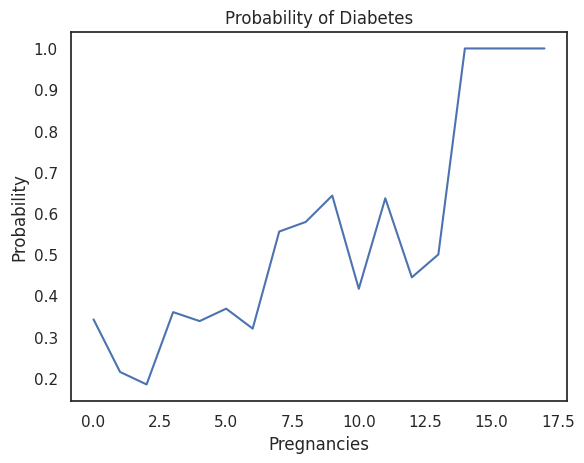

In [21]:
df.groupby('Pregnancies')['Outcome'].mean().plot(kind = 'line')
plt.title('Probability of Diabetes')
plt.ylabel('Probability')
plt.show()

**Observation:**
* As the times of pregnancies increases, the probability of diabetes increases. Based on these trend, we can think that the times of pregnancies are related with the probabiliy of diabetes.

* For women with over 10 times pregnancies, she have 100% probability of diabetes. But the number of data for over 10 times pregnancies are too small, so data can be distorted.

## **3.3 Glucose**

In [22]:
# Counts of 0 values
df[df['Glucose']==0]['Glucose'].value_counts()

0    5
Name: Glucose, dtype: int64

* As we saw above, Glucose feature has 5 null values.

Text(0.5, 1.0, 'Boxplot: Glucose vs Outcome')

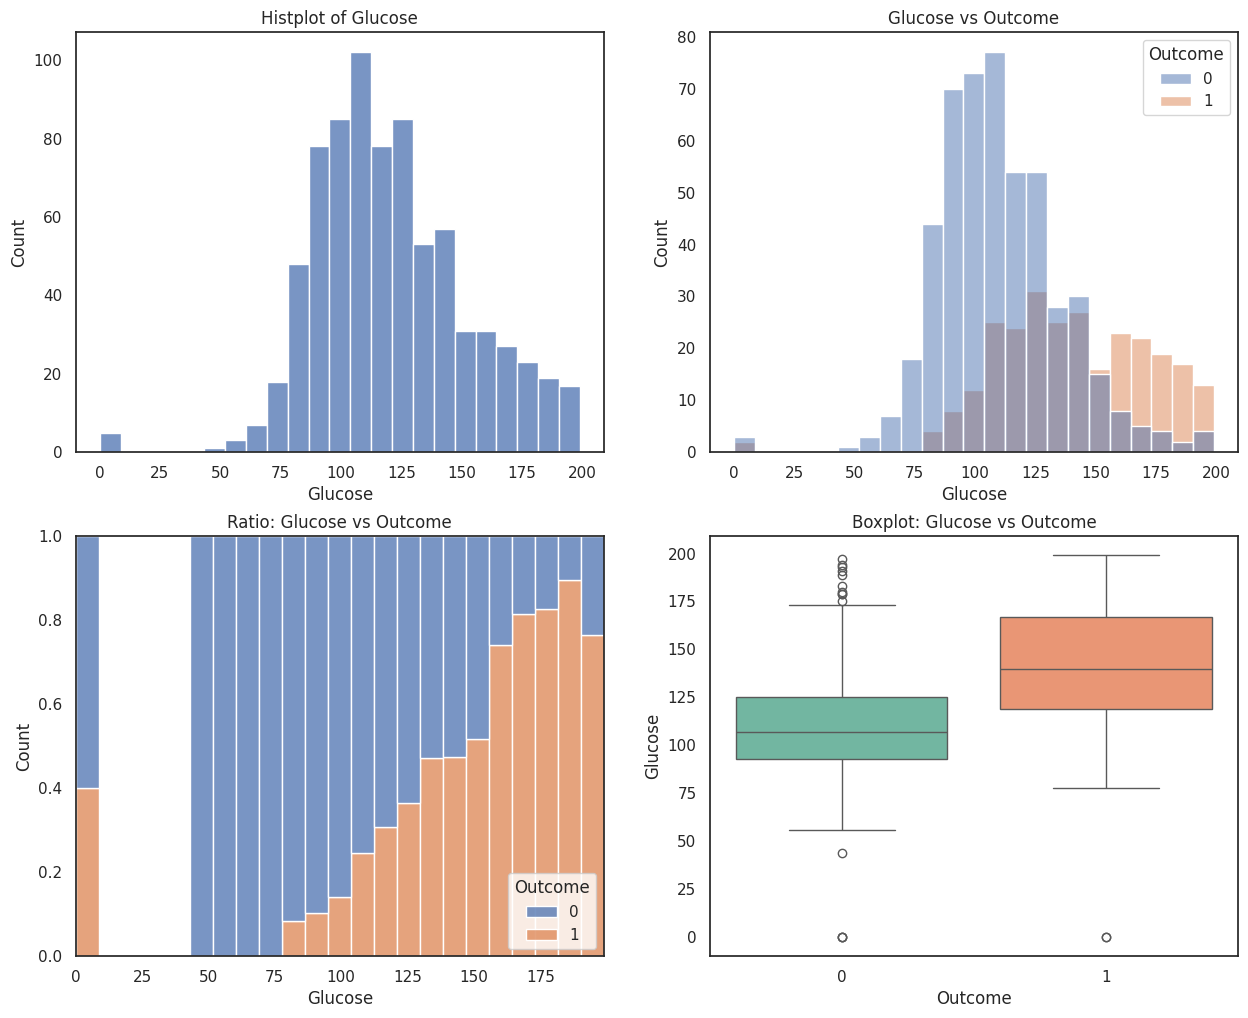

In [23]:
f, ax = plt.subplots(2,2, figsize = (15,12))
sns.histplot(x='Glucose', data = df, ax = ax[0,0])
ax[0,0].set_title('Histplot of Glucose')
sns.histplot(x='Glucose', hue = 'Outcome', data = df, ax = ax[0,1])
ax[0,1].set_title('Glucose vs Outcome')
sns.histplot(df, x='Glucose', hue = 'Outcome', multiple = 'fill', ax = ax[1,0])
ax[1,0].set_title('Ratio: Glucose vs Outcome')
sns.boxplot(df, x='Outcome', y='Glucose', palette='Set2', ax = ax[1,1])
ax[1,1].set_title('Boxplot: Glucose vs Outcome')

In [24]:
df2 = df.copy()
df2 = df2[df2['Glucose']!=0]
df2.groupby('Outcome')['Glucose'].agg(['mean', 'median', 'count']).reset_index()

,Outcome,mean,median,count
0,0,110.643863,107.0,497
1,1,142.319549,140.0,266


**Observation:**

* In Glucose vs Outcome plot, we can see the number of diabetes(outcome == 1) increase as the Glucose values increase. And this can be also represented in Ratio: Glucose vs Outcome plot and boxplot.

* The mean and median values for diabetes(outcome == 1) are higher than those for no diabetes(outcome ==0).

    -> Based on this trend, Glucose values must be related with diabetes.

## **3.4 BloodPressure**

In [25]:
# Counts of 0 values
df[df['BloodPressure']==0]['BloodPressure'].value_counts()

0    35
Name: BloodPressure, dtype: int64

Text(0.5, 1.0, 'Histplot of BloodPressure')

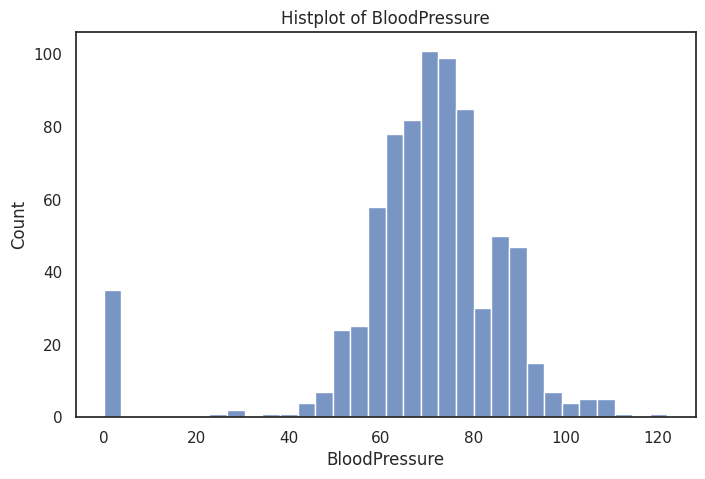

In [26]:
# Plot of BloodPressure feature
f, ax = plt.subplots(figsize = (8,5))
sns.histplot(x='BloodPressure', data = df)
ax.set_title('Histplot of BloodPressure')

* As we saw above, BloodPressure feature has 35 null values.

In [27]:
# Dataframe of BloodPressure feature without 0 values
df2 = df.copy()
df2 = df2[df2['BloodPressure']!=0]

Text(0.5, 1.0, 'Boxplot: BloodPressure vs Outcome')

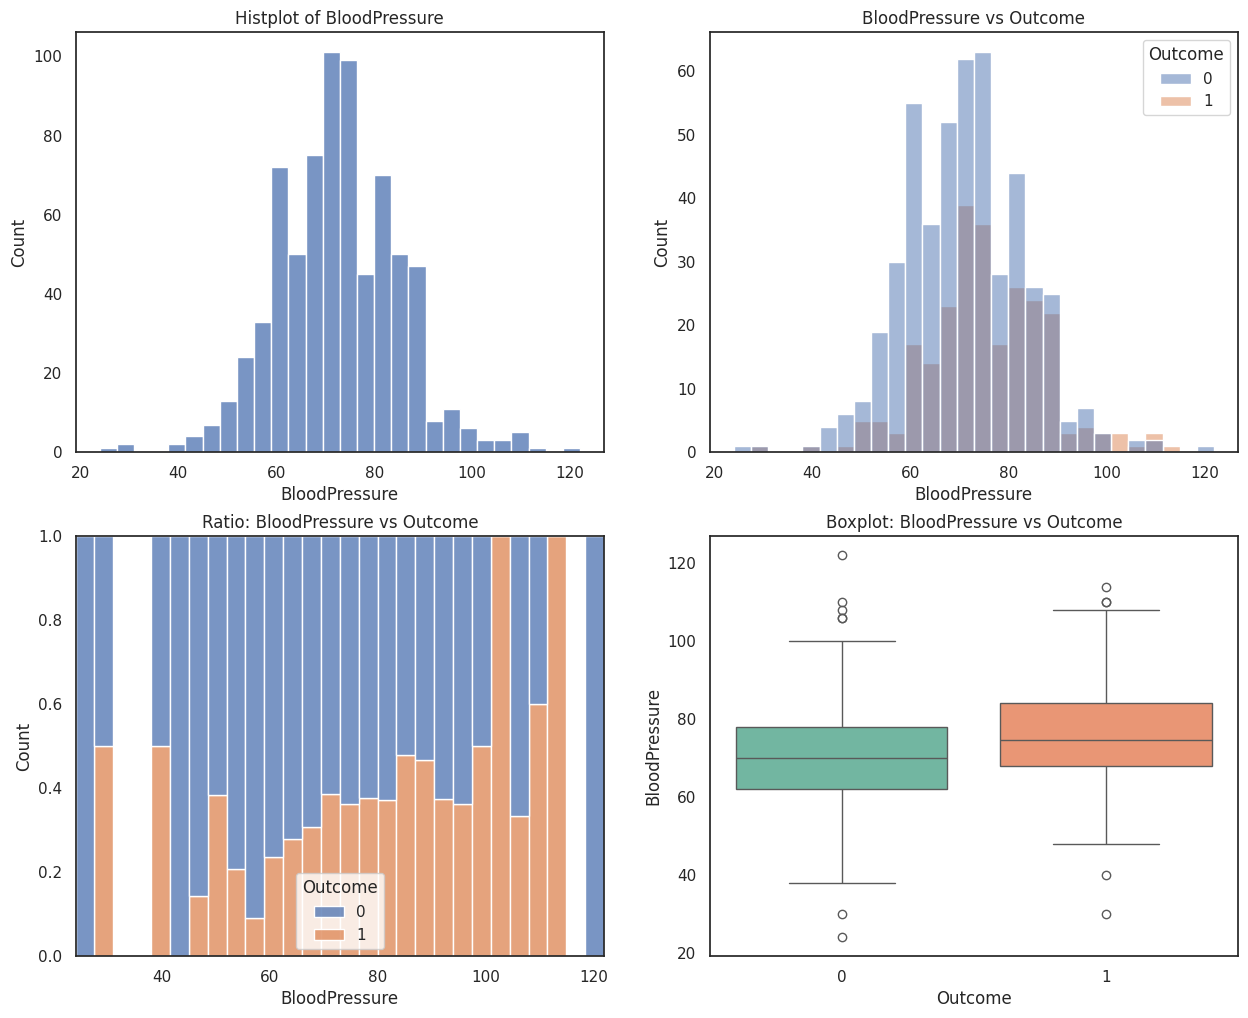

In [28]:
# Plot of BloodPressure feature without 0 values
f, ax = plt.subplots(2,2, figsize = (15,12))
sns.histplot(x='BloodPressure', data = df2, ax = ax[0,0])
ax[0,0].set_title('Histplot of BloodPressure')
sns.histplot(x='BloodPressure', hue = 'Outcome', data = df2, ax = ax[0,1])
ax[0,1].set_title('BloodPressure vs Outcome')
sns.histplot(df2, x='BloodPressure', hue = 'Outcome', multiple = 'fill', ax = ax[1,0])
ax[1,0].set_title('Ratio: BloodPressure vs Outcome')
sns.boxplot(df2, x='Outcome', y='BloodPressure', palette='Set2', ax = ax[1,1])
ax[1,1].set_title('Boxplot: BloodPressure vs Outcome')

In [29]:
df2.groupby('Outcome')['BloodPressure'].agg(['mean', 'median', 'count']).reset_index()

,Outcome,mean,median,count
0,0,70.877339,70.0,481
1,1,75.321429,74.5,252


**Observation:**

* Without 0 values, the distribution of blood pressure data is nearly normal distribution.

* Except values between 20-40, the probability of diabetes increases as blood presssure increases. And we can also see this trend in boxplot with or without 0 values. Higher BloodPressure might be one of the reason for disbetes.

* The mean and median values diabetes(outcome == 1) are higher than those for no diabetes(outcome ==0).

    -> Based on this trend, Glucose values must be related with diabetes.

## **3.5 SkinThickness**

In [30]:
# Counts of 0 values
df[df['SkinThickness']==0]['SkinThickness'].value_counts()

0    227
Name: SkinThickness, dtype: int64

* As we saw above, SkinThickness feature has 227 null values.

Text(0.5, 1.0, 'Histplot of SkinThickness')

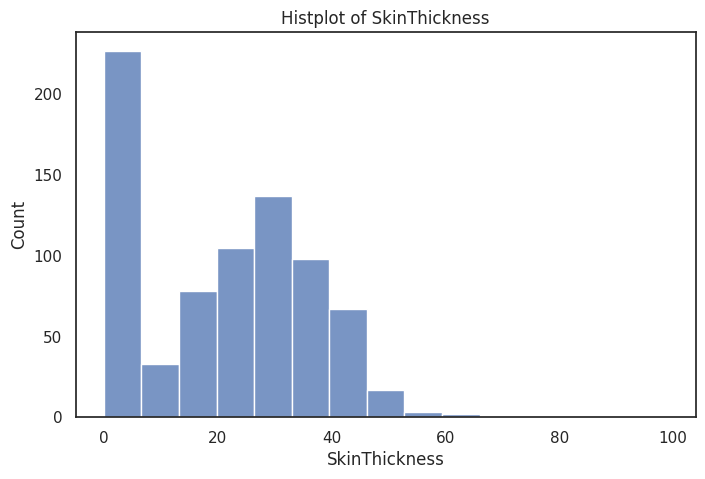

In [31]:
# Plot of SkinThickness feature
f, ax = plt.subplots(figsize = (8,5))
sns.histplot(x='SkinThickness', data = df)
ax.set_title('Histplot of SkinThickness')

In [32]:
# Dataframe of BloodPressure feature without 0 values
df2 = df.copy()
df2 = df2[df2['SkinThickness']!=0]

Text(0.5, 1.0, 'Boxplot: SkinThickness vs Outcome')

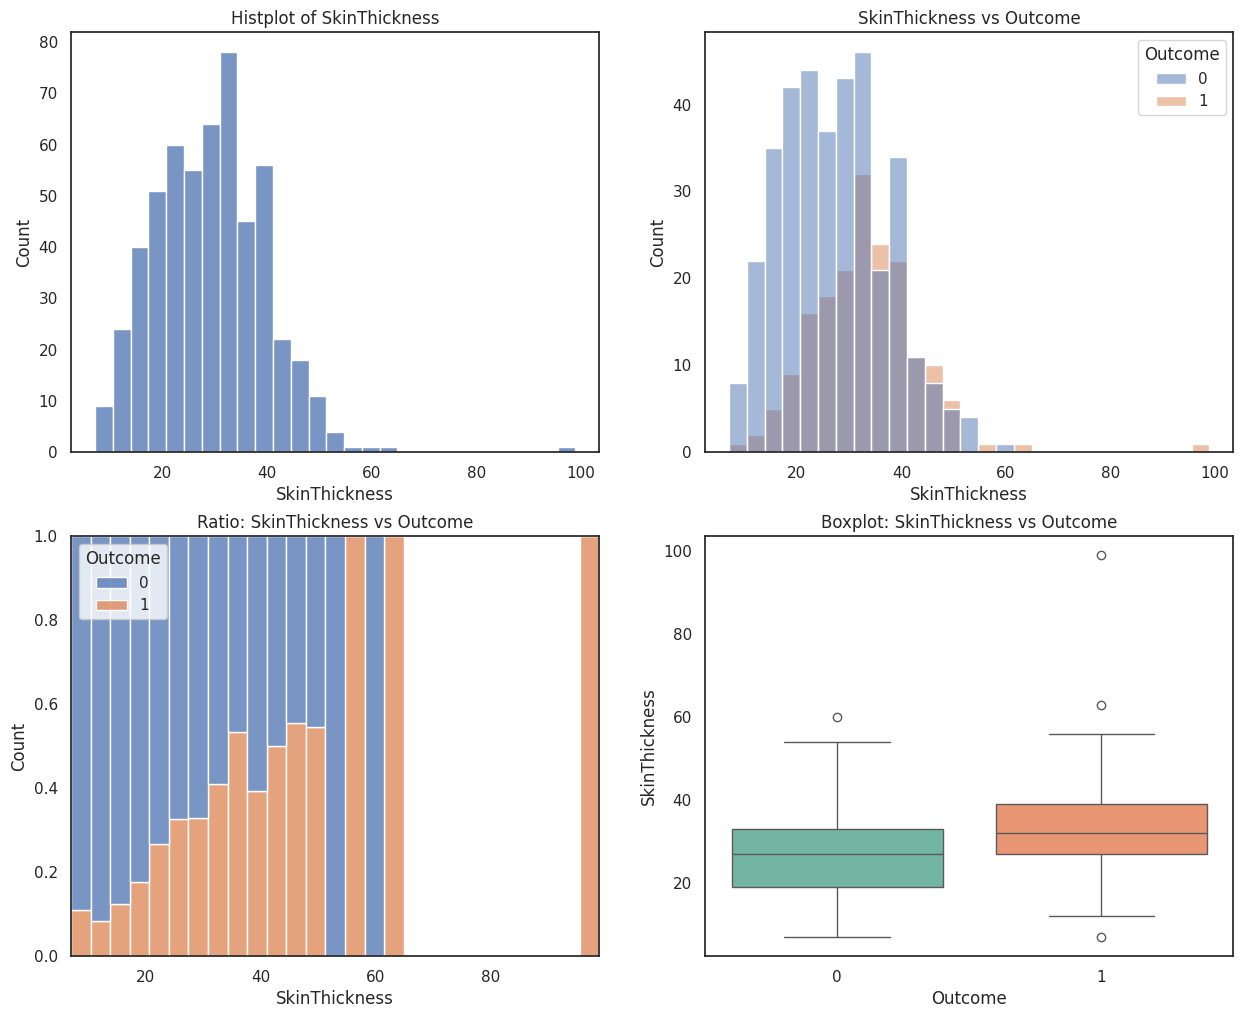

In [33]:
# Plot of SkinThickness feature without 0 values
f, ax = plt.subplots(2,2, figsize = (15,12))
sns.histplot(x='SkinThickness', data = df2, ax = ax[0,0])
ax[0,0].set_title('Histplot of SkinThickness')
sns.histplot(x='SkinThickness', hue = 'Outcome', data = df2, ax = ax[0,1])
ax[0,1].set_title('SkinThickness vs Outcome')
sns.histplot(df2, x='SkinThickness', hue = 'Outcome', multiple = 'fill', ax = ax[1,0])
ax[1,0].set_title('Ratio: SkinThickness vs Outcome')
sns.boxplot(df2, x='Outcome', y='SkinThickness', palette='Set2', ax = ax[1,1])
ax[1,1].set_title('Boxplot: SkinThickness vs Outcome')

In [34]:
df2.groupby('Outcome')['SkinThickness'].agg(['mean', 'median', 'count']).reset_index()

,Outcome,mean,median,count
0,0,27.235457,27.0,361
1,1,33.000000,32.0,180


**Observation:**

* Without 0 values, the probability increases as SkinThickness increases. And the mean and median values diabetes(outcome == 1) are higher than those for no diabetes(outcome ==0).

    -> Based on this trend, Glucose values must be related with diabetes.
    
* About 100 might be outlier. So we need to preperly handle this values to make good model.

## **3.6 Insulin**

In [35]:
# Counts of 0 values
df[df['Insulin']==0]['Insulin'].value_counts()

0    374
Name: Insulin, dtype: int64

Text(0.5, 1.0, 'Histplot of Insulin')

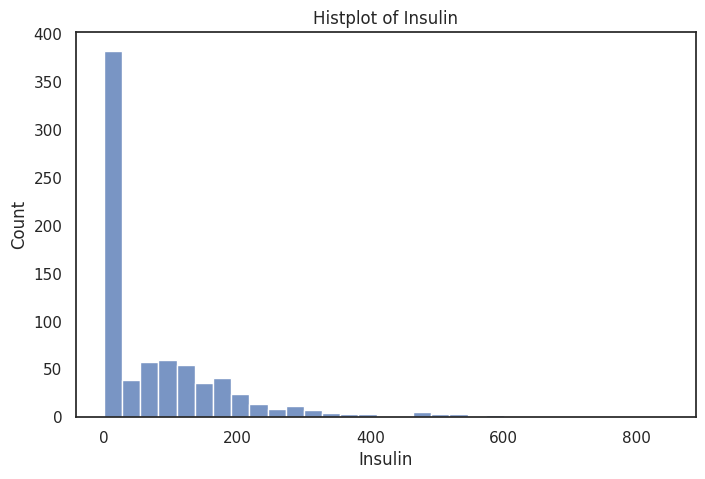

In [36]:
# Plot of Insulin feature
f, ax = plt.subplots(figsize = (8,5))
sns.histplot(x='Insulin', data = df)
ax.set_title('Histplot of Insulin')

* As we saw above, Insulin feature has 375 null values.

In [37]:
# Dataframe of BloodPressure feature without 0 values
df2 = df.copy()
df2 = df2[df2['Insulin']!=0]

Text(0.5, 1.0, 'Boxplot: Insulin vs Outcome')

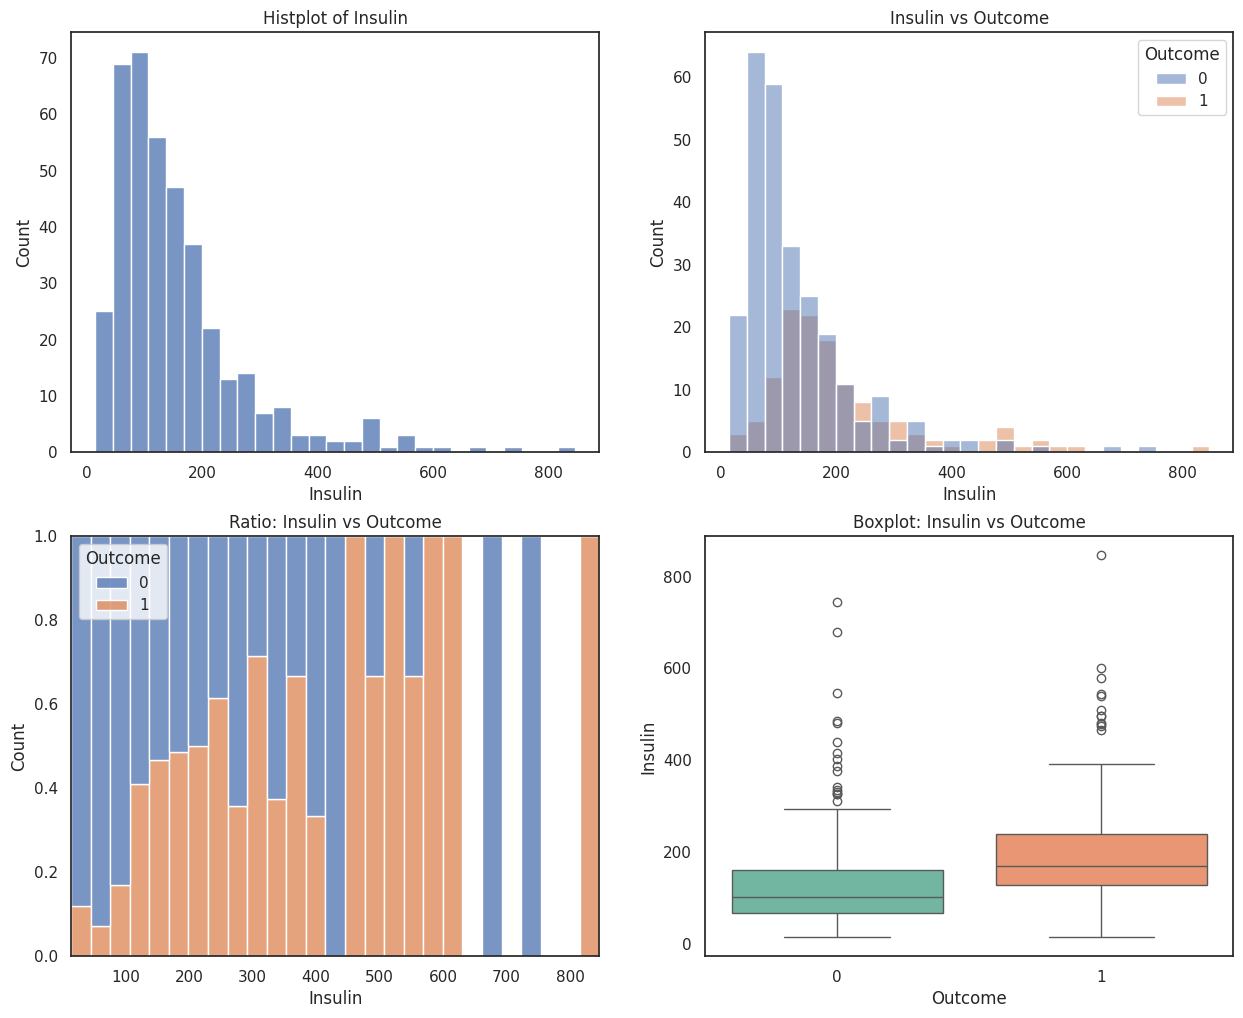

In [38]:
# Plot of Insulin feature without 0 values
f, ax = plt.subplots(2,2, figsize = (15,12))
sns.histplot(x='Insulin', data = df2, ax = ax[0,0])
ax[0,0].set_title('Histplot of Insulin')
sns.histplot(x='Insulin', hue = 'Outcome', data = df2, ax = ax[0,1])
ax[0,1].set_title('Insulin vs Outcome')
sns.histplot(df2, x='Insulin', hue = 'Outcome', multiple = 'fill', ax = ax[1,0])
ax[1,0].set_title('Ratio: Insulin vs Outcome')
sns.boxplot(df2, x='Outcome', y='Insulin', palette='Set2', ax = ax[1,1])
ax[1,1].set_title('Boxplot: Insulin vs Outcome')

In [39]:
df2.groupby('Outcome')['Insulin'].agg(['mean', 'median', 'count']).reset_index()

,Outcome,mean,median,count
0,0,130.287879,102.5,264
1,1,206.846154,169.5,130


**Observation:**
* Without 0 values, the probability increases as the insulin values increases. And the mean and median values diabetes(outcome == 1) are higher than those for no diabetes(outcome ==0).
* The distribution shows the positively skewed distributions. So we need log transformation.

## **3.7 BMI**

In [40]:
# Counts of 0 values
df[df['BMI']==0]['BMI'].value_counts()

0.0    11
Name: BMI, dtype: int64

Text(0.5, 1.0, 'Histplot of BMI')

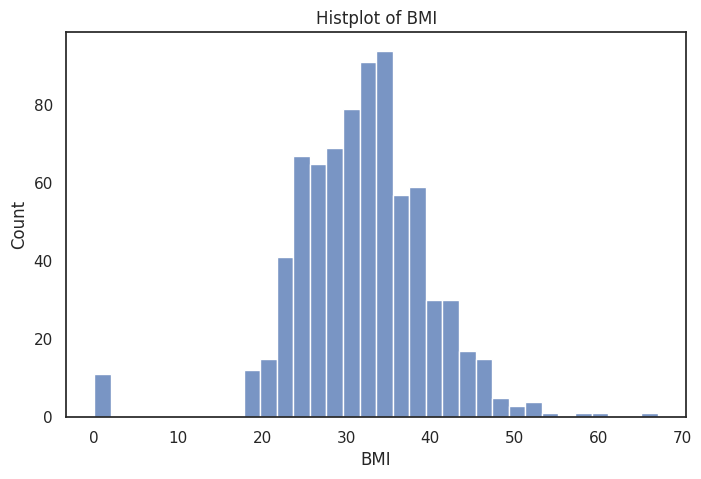

In [41]:
# Plot of BMI feature
f, ax = plt.subplots(figsize = (8,5))
sns.histplot(x='BMI', data = df)
ax.set_title('Histplot of BMI')

* As we saw above, BMI feature has 11 null values.

In [42]:
# Dataframe of BMI feature without 0 values
df2 = df.copy()
df2 = df2[df2['BMI']!=0]

Text(0.5, 1.0, 'Boxplot: BMI vs Outcome')

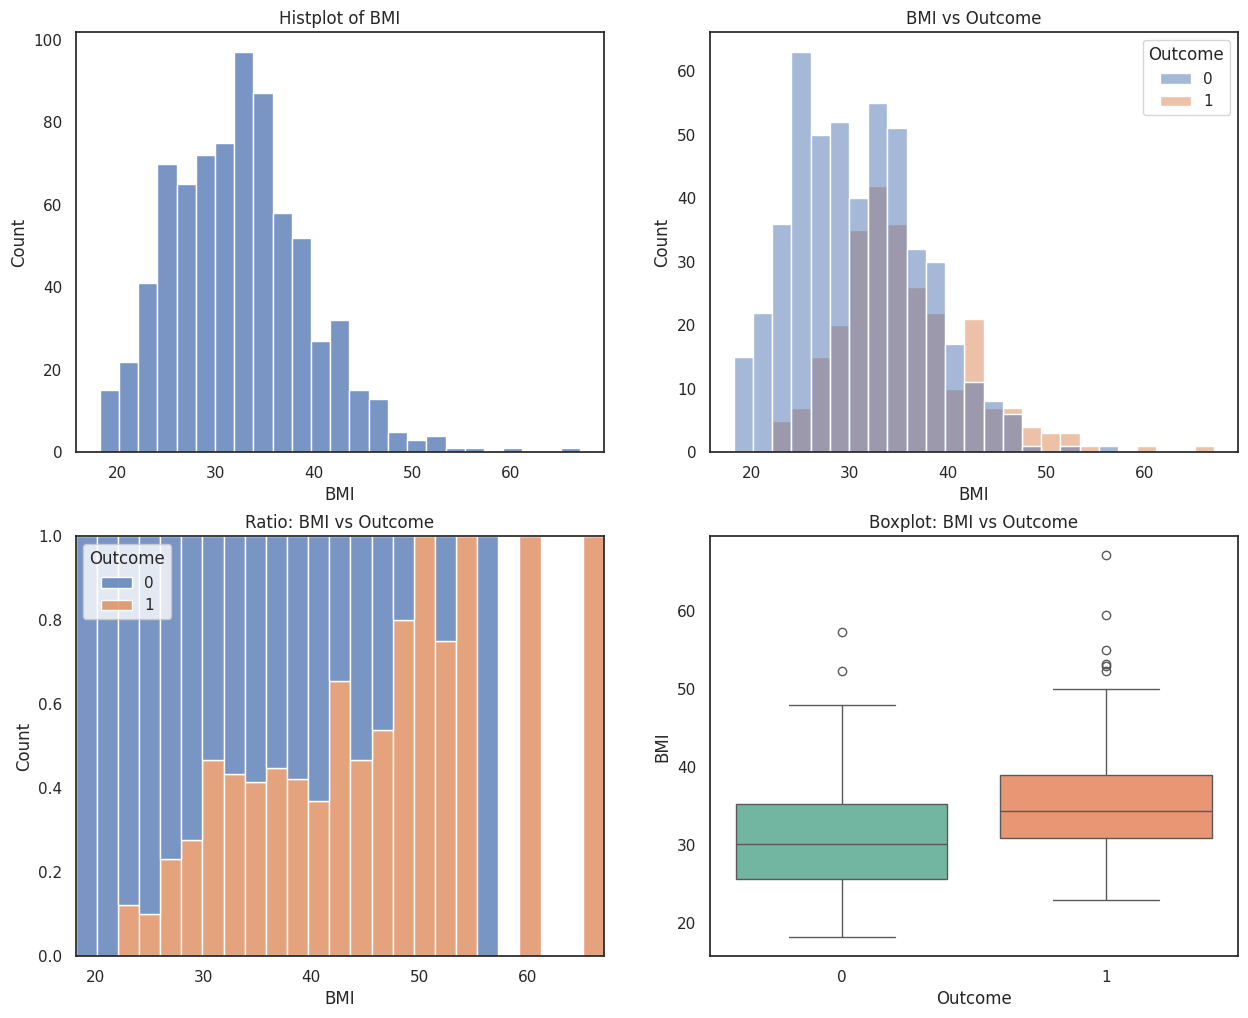

In [43]:
# Plot of BMI feature without 0 values
f, ax = plt.subplots(2,2, figsize = (15,12))
sns.histplot(x='BMI', data = df2, ax = ax[0,0])
ax[0,0].set_title('Histplot of BMI')
sns.histplot(x='BMI', hue = 'Outcome', data = df2, ax = ax[0,1])
ax[0,1].set_title('BMI vs Outcome')
sns.histplot(df2, x='BMI', hue = 'Outcome', multiple = 'fill', ax = ax[1,0])
ax[1,0].set_title('Ratio: BMI vs Outcome')
sns.boxplot(df2, x='Outcome', y='BMI', palette='Set2', ax = ax[1,1])
ax[1,1].set_title('Boxplot: BMI vs Outcome')

In [44]:
df2.groupby('Outcome')['BMI'].agg(['mean', 'median', 'count']).reset_index()

,Outcome,mean,median,count
0,0,30.859674,30.1,491
1,1,35.406767,34.3,266


**Observation:**
* Without 0 values, the probability increases as the BMI values increases like other features (Pregnanciesm Glucose, BloodPressure, SkinThickness and Insulin). And the mean and median values diabetes(outcome == 1) are higher than those for no diabetes(outcome ==0).

* BMI over 60 could be outliers. After handling of 0 values, we might consider the treat outlier values.

## **3.8 DiabetesPedigreeFunction**

In [45]:
# Counts of 0 values
df[df['DiabetesPedigreeFunction']==0]['DiabetesPedigreeFunction'].value_counts()

Series([], Name: DiabetesPedigreeFunction, dtype: int64)

Text(0.5, 1.0, 'Boxplot: DiabetesPedigreeFunction vs Outcome')

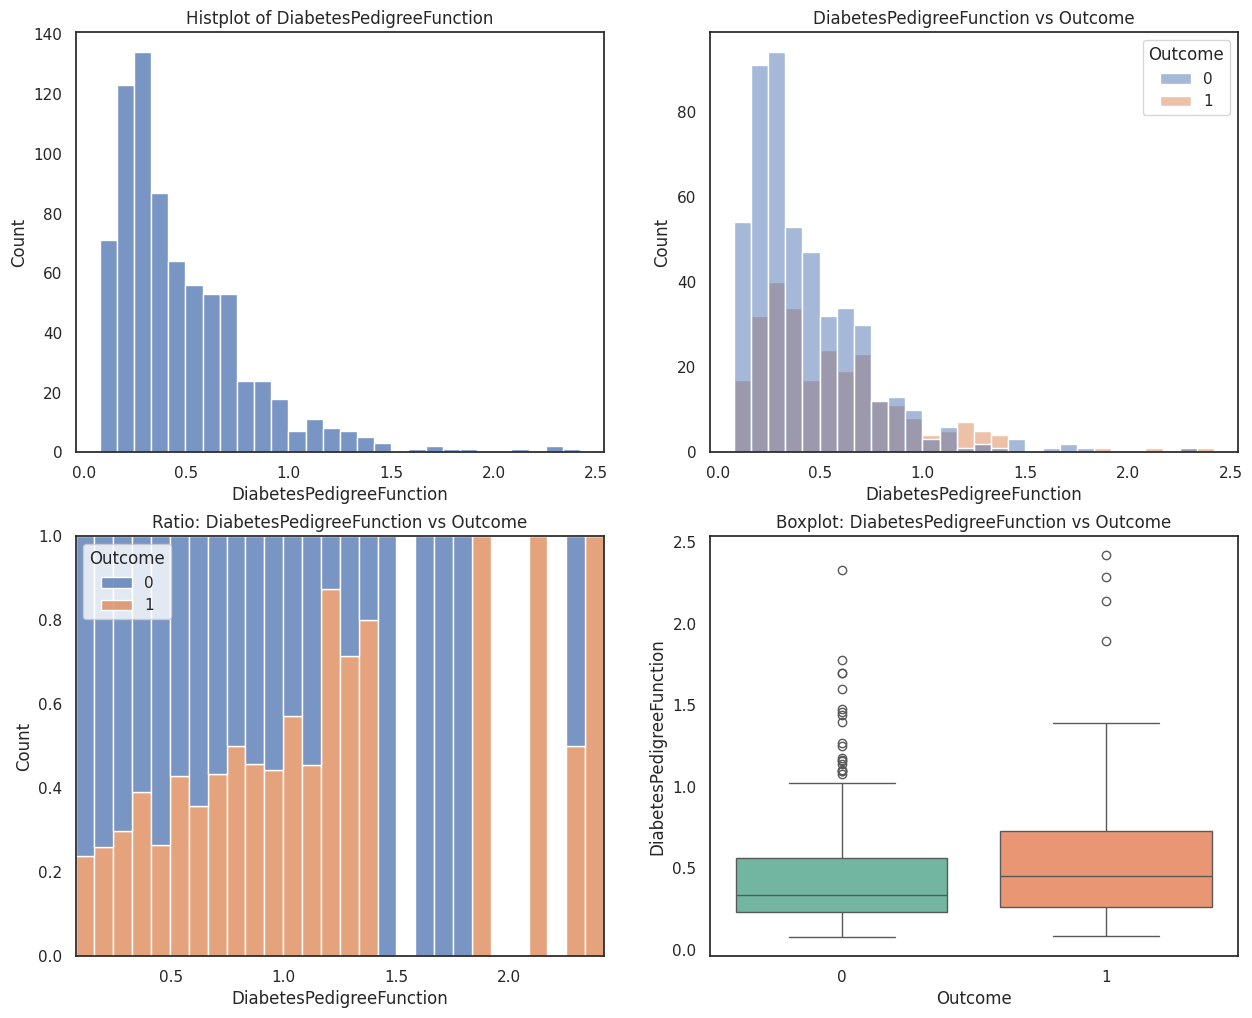

In [46]:
# Plot of DiabetesPedigreeFunction feature
f, ax = plt.subplots(2,2, figsize = (15,12))
sns.histplot(x='DiabetesPedigreeFunction', data = df2, ax = ax[0,0])
ax[0,0].set_title('Histplot of DiabetesPedigreeFunction')
sns.histplot(x='DiabetesPedigreeFunction', hue = 'Outcome', data = df2, ax = ax[0,1])
ax[0,1].set_title('DiabetesPedigreeFunction vs Outcome')
sns.histplot(df2, x='DiabetesPedigreeFunction', hue = 'Outcome', multiple = 'fill', ax = ax[1,0])
ax[1,0].set_title('Ratio: DiabetesPedigreeFunction vs Outcome')
sns.boxplot(df2, x='Outcome', y='DiabetesPedigreeFunction', palette='Set2', ax = ax[1,1])
ax[1,1].set_title('Boxplot: DiabetesPedigreeFunction vs Outcome')

In [47]:
df2.groupby('Outcome')['DiabetesPedigreeFunction'].agg(['mean', 'median', 'count']).reset_index()

,Outcome,mean,median,count
0,0,0.428908,0.3370,491
1,1,0.552786,0.4515,266


**Observation:**
* Without 0 values, the probability increases as the DiabetesPedigreeFunction values increases. And the mean and median values diabetes(outcome == 1) are higher than those for no diabetes(outcome ==0).
* The distribution shows the positively skewed distributions. So we need log transformation.

## **3.8 Age**

In [48]:
# Counts of 0 values
df[df['Age']==0]['Age'].value_counts()

Series([], Name: Age, dtype: int64)

Text(0.5, 1.0, 'Boxplot: Age vs Outcome')

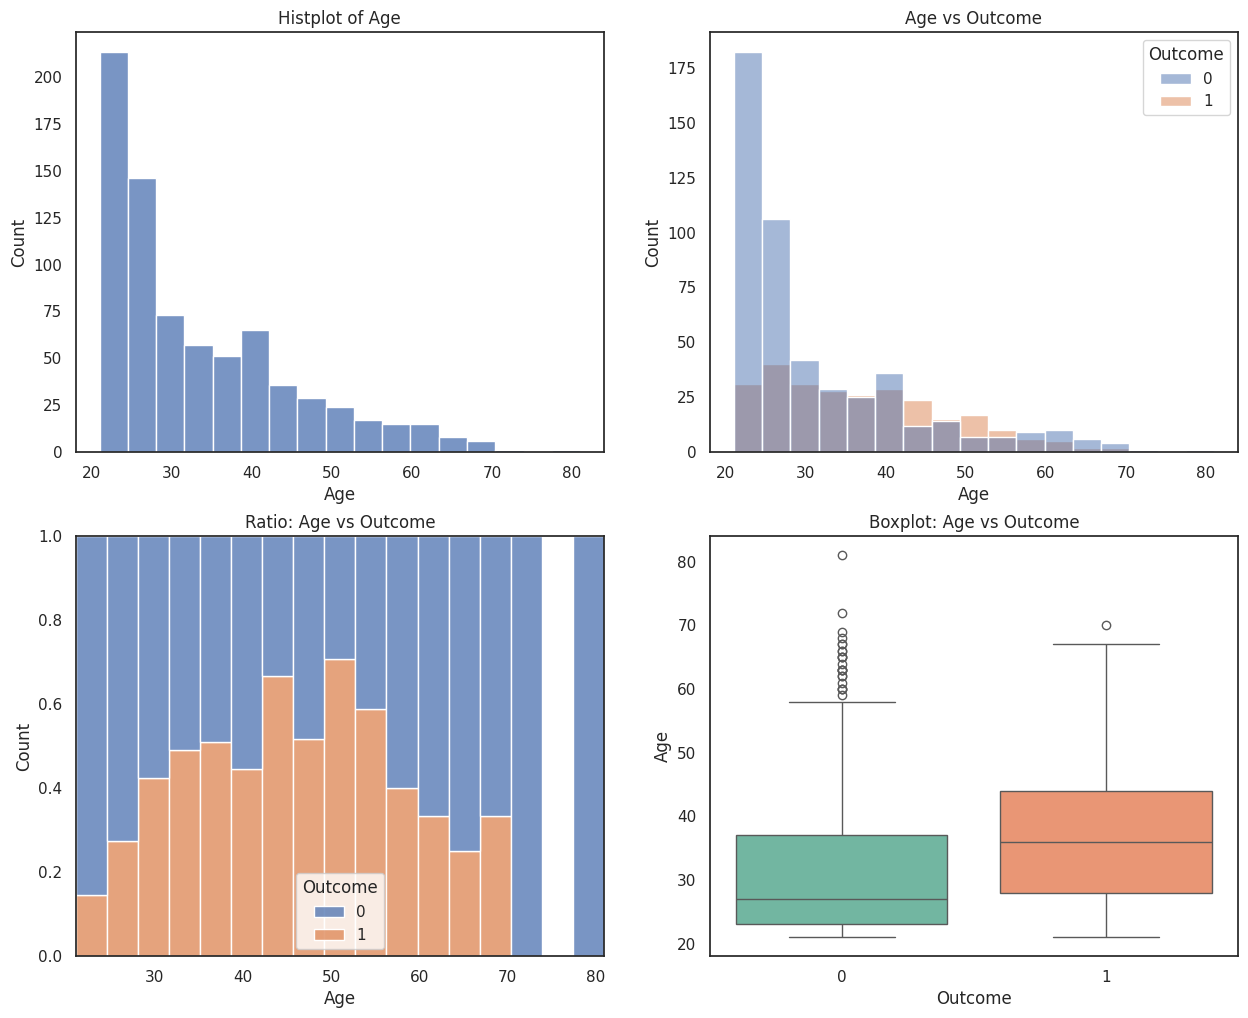

In [49]:
# Plot of Age feature
f, ax = plt.subplots(2,2, figsize = (15,12))
sns.histplot(x='Age', data = df2, ax = ax[0,0])
ax[0,0].set_title('Histplot of Age')
sns.histplot(x='Age', hue = 'Outcome', data = df2, ax = ax[0,1])
ax[0,1].set_title('Age vs Outcome')
sns.histplot(df2, x='Age', hue = 'Outcome', multiple = 'fill', ax = ax[1,0])
ax[1,0].set_title('Ratio: Age vs Outcome')
sns.boxplot(df2, x='Outcome', y='Age', palette='Set2', ax = ax[1,1])
ax[1,1].set_title('Boxplot: Age vs Outcome')

In [50]:
df2.groupby('Outcome')['Age'].agg(['mean', 'median', 'count']).reset_index()

,Outcome,mean,median,count
0,0,31.250509,27.0,491
1,1,37.030075,36.0,266


**Observation:**
* Without 0 values, the probability increases as the Age values increases.
* And the mean and median values diabetes(outcome == 1) are higher than those for no diabetes(outcome ==0).

## **3.8 Relation between features**

In [51]:
df2 = df.copy()
df2 = df2[feature_columns[1:]].replace(0, np.nan)
df2 = df2.dropna()
df2.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

<Axes: >

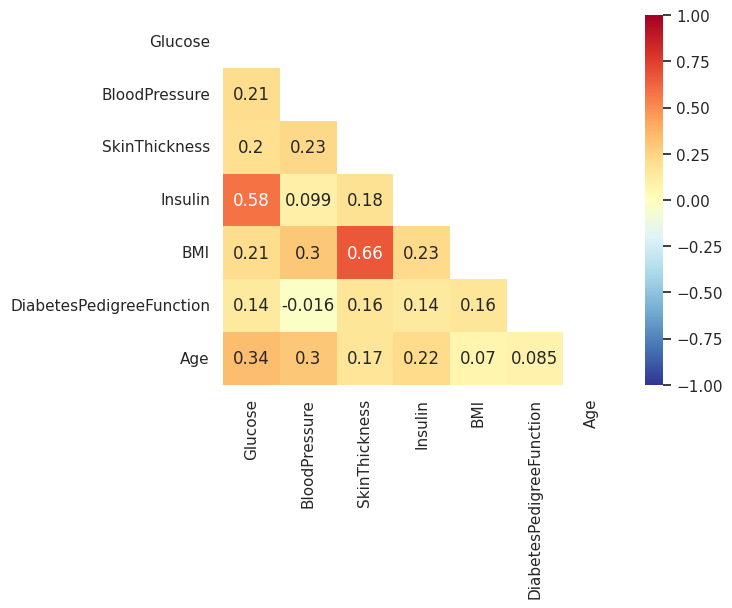

In [52]:
mask = np.zeros_like(df2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df2.corr(), annot = True, cmap = 'RdYlBu_r',
               vmin = -1, vmax = 1, mask = mask)

**Observation:**
* Correlation coefficient between Insulin and Glucose feature and one between BMI and SkinThickness are higher than others. Higher correlation coefficient means that two features are highly related with each other.
    
    -> During feature engineering, we can properly handle the 0 values of Insulin and BMI using Glucose and SkinThickness.

## **3.9 Summary**

* Outcome
    - The diabetes incidence rate(Outcome == 1) appears to be around 34%.

* Pregnancies
    - As the times of pregnancies increases, the probability of diabetes increases.

* Glucose, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction
    - The number of diabetes(outcome == 1) increase as the feature values increase without 0 values.
    - The mean and median values for diabetes(outcome == 1) are higher than those for no diabetes(outcome ==0).

        -> Based on this trend, Glucose values must be related with diabetes.

* BloodPressure
    - Except values between 20-40, the probability of diabetes increases as blood presssure increases.
    - The mean and median values diabetes(outcome == 1) are higher than those for no diabetes(outcome ==0).

        -> Based on this trend, Glucose values must be related with diabetes.

* Age
    * Without 0 values, the probability increases as the Age values increases.
    * And the mean and median values diabetes(outcome == 1) are higher than those for no diabetes(outcome ==0).

# **4. Feature Engineering**

## **4.0 Data Split**

* For train and test model, we need to split data before feature engineering.

In [53]:
from sklearn.model_selection import train_test_split

df2 = df.copy()
y = df2['Outcome'].copy()
X = df2.drop('Outcome', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [55]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
22,7,196,90,0,0,39.8,0.451,41
497,2,81,72,15,76,30.1,0.547,25
395,2,127,58,24,275,27.7,1.600,25
381,0,105,68,22,0,20.0,0.236,22
258,1,193,50,16,375,25.9,0.655,24


In [56]:
col_list = X_train.columns
X_train2 = X_train[col_list[1:]].copy()
X_train2.replace(0,np.nan, inplace = True)
X_train2.isnull().sum()

Glucose                       5
BloodPressure                27
SkinThickness               188
Insulin                     316
BMI                           8
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

## **4.1 Pregnancies**

* As we saw in EDA section, the number of data for over 10 times pregnancies are too small, so data can be distorted.

    -> To solve this problem, I make the pregnancies data to categorize.

In [57]:
# Categorize of train data
X_train['Pregnancies_cat'] = 0
X_train['Pregnancies_cat'][X_train['Pregnancies']>=3] = 1
X_train['Pregnancies_cat'][X_train['Pregnancies']>=7] = 2
X_train['Pregnancies_cat'][X_train['Pregnancies']>=11] = 3
print(X_train['Pregnancies_cat'].unique())
X_train.head()

[2 0 1 3]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_cat
22,7,196,90,0,0,39.8,0.451,41,2
497,2,81,72,15,76,30.1,0.547,25,0
395,2,127,58,24,275,27.7,1.600,25,0
381,0,105,68,22,0,20.0,0.236,22,0
258,1,193,50,16,375,25.9,0.655,24,0


In [58]:
# Categorize of test data
X_test['Pregnancies_cat'] = 0
X_test['Pregnancies_cat'][X_test['Pregnancies']>=3] = 1
X_test['Pregnancies_cat'][X_test['Pregnancies']>=7] = 2
X_test['Pregnancies_cat'][X_test['Pregnancies']>=11] = 3
print(X_test['Pregnancies_cat'].unique())
X_test.head()

[0 2 1 3]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_cat
680,2,56,56,28,45,24.2,0.332,22,0
607,1,92,62,25,41,19.5,0.482,25,0
639,1,100,74,12,46,19.5,0.149,28,0
638,7,97,76,32,91,40.9,0.871,32,2
295,6,151,62,31,120,35.5,0.692,28,1


Text(0.5, 1.0, 'Countplot of Test Data')

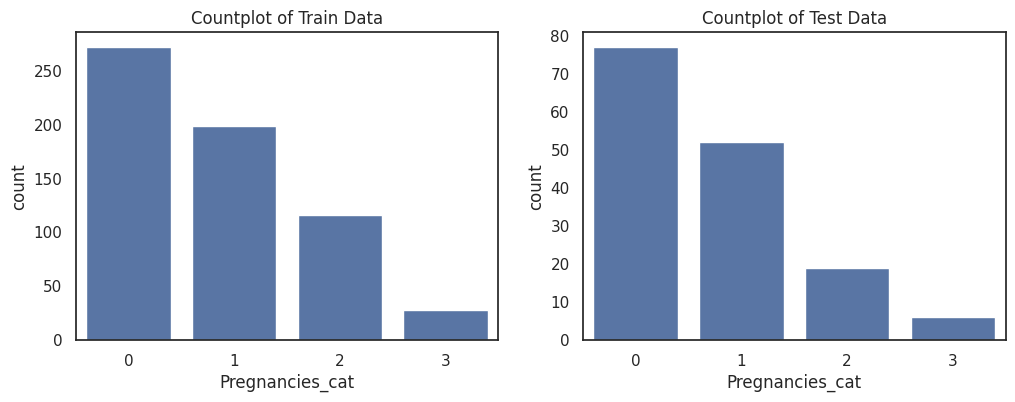

In [59]:
f, ax = plt.subplots(1,2, figsize = (12,4))
sns.countplot(x='Pregnancies_cat', data=X_train, ax=ax[0])
ax[0].set_title('Countplot of Train Data')
sns.countplot(x='Pregnancies_cat', data=X_test, ax=ax[1])
ax[1].set_title('Countplot of Test Data')

## **4.2 Glucose**

* As we saw above, Glucose feature has 5 null values.

    -> Fill 0 values using median values of each Outcome groups.

In [60]:
# Count of Glucose feature == 0
print(f"Train data: {X_train[X_train['Glucose']==0]['Glucose'].count()}")
print(f"Test data: {X_test[X_test['Glucose']==0]['Glucose'].count()}")

Train data: 5
Test data: 0


In [61]:
# Outcome of Glucose feature == 0 (train data)
y_train[X_train['Glucose']==0]

182    0
349    1
342    0
75     0
502    1
Name: Outcome, dtype: int64

In [62]:
# Median value of Outcome == 0
glc_med_0 = int(X_train.loc[y_train[y_train==0].index,'Glucose'].median())
# Median value of Outcome == 1
glc_med_1 = int(X_train.loc[y_train[y_train==1].index,'Glucose'].median())

In [63]:
# Change Glucose values from 0 to median values
idx_null = y_train[X_train['Glucose']==0].index

print(X_train.loc[idx_null,'Glucose'])

for k,v in y_train[X_train['Glucose']==0].items():
    if v==0:
        X_train.loc[k,'Glucose'] = glc_med_0
    else:
        X_train.loc[k,'Glucose'] = glc_med_1

X_train.loc[idx_null,'Glucose']

182    0
349    0
342    0
75     0
502    0
Name: Glucose, dtype: int64


182    107
349    137
342    107
75     107
502    137
Name: Glucose, dtype: int64

In [64]:
# Count of Glucose feature == 0
print(f"Train data: {X_train[X_train['Glucose']==0]['Glucose'].count()}")
print(f"Test data: {X_test[X_test['Glucose']==0]['Glucose'].count()}")

Train data: 0
Test data: 0


Text(0.5, 1.0, 'Glucose Distirbution (Test)')

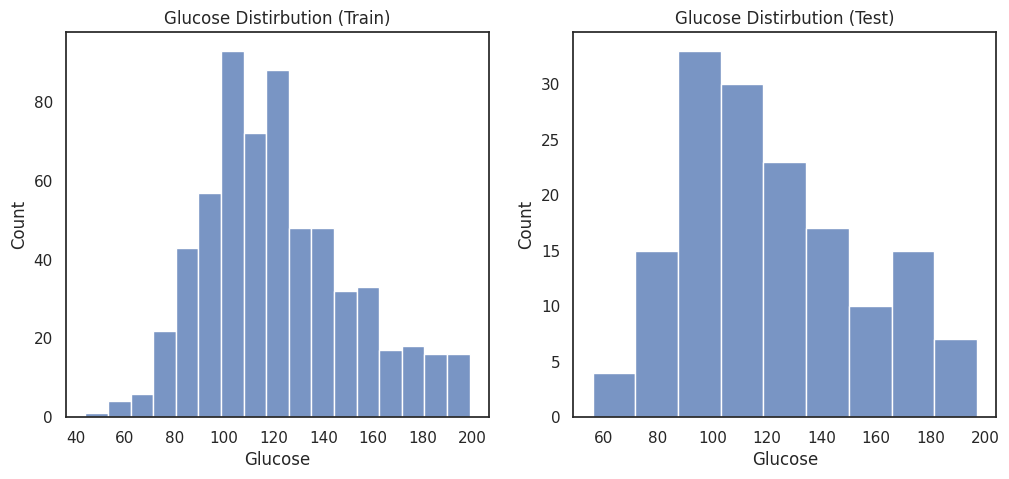

In [65]:
f, ax = plt.subplots(1,2, figsize = (12,5))
sns.histplot(x='Glucose', data = X_train, ax = ax[0])
ax[0].set_title('Glucose Distirbution (Train)')
sns.histplot(x='Glucose', data = X_test, ax = ax[1])
ax[1].set_title('Glucose Distirbution (Test)')

## **4.3 BloodPressure**

* As we saw above, BloodPressure feature has 27 null values.

    -> Fill 0 values using median values of each Outcome groups.

In [66]:
# Count of BloodPressure feature == 0
print(f"Train data: {X_train[X_train['BloodPressure']==0]['BloodPressure'].count()}")
print(f"Test data: {X_test[X_test['BloodPressure']==0]['BloodPressure'].count()}")

Train data: 27
Test data: 8


In [67]:
# Median value of Outcome == 0
bp_med_0 = int(X_train.loc[y_train[y_train==0].index,'BloodPressure'].median())
# Median value of Outcome == 1
bp_med_1 = int(X_train.loc[y_train[y_train==1].index,'BloodPressure'].median())

In [68]:
# Change BloodPressure values from 0 to median values (train data)
idx_null = y_train[X_train['BloodPressure']==0].index

for k,v in y_train[X_train['BloodPressure']==0].items():
    if v==0:
        X_train.loc[k,'BloodPressure'] = bp_med_0
    else:
        X_train.loc[k,'BloodPressure'] = bp_med_1

In [69]:
# Change BloodPressure values from 0 to median values of train data (test data)
idx_null = y_test[X_test['BloodPressure']==0].index

for k,v in y_test[X_test['BloodPressure']==0].items():
    if v==0:
        X_test.loc[k,'BloodPressure'] = bp_med_0
    else:
        X_test.loc[k,'BloodPressure'] = bp_med_1

In [70]:
# Count of BloodPressure feature == 0
print(f"Train data: {X_train[X_train['BloodPressure']==0]['BloodPressure'].count()}")
print(f"Test data: {X_test[X_test['BloodPressure']==0]['BloodPressure'].count()}")

Train data: 0
Test data: 0


Text(0.5, 1.0, 'BloodPressure Distirbution (Test)')

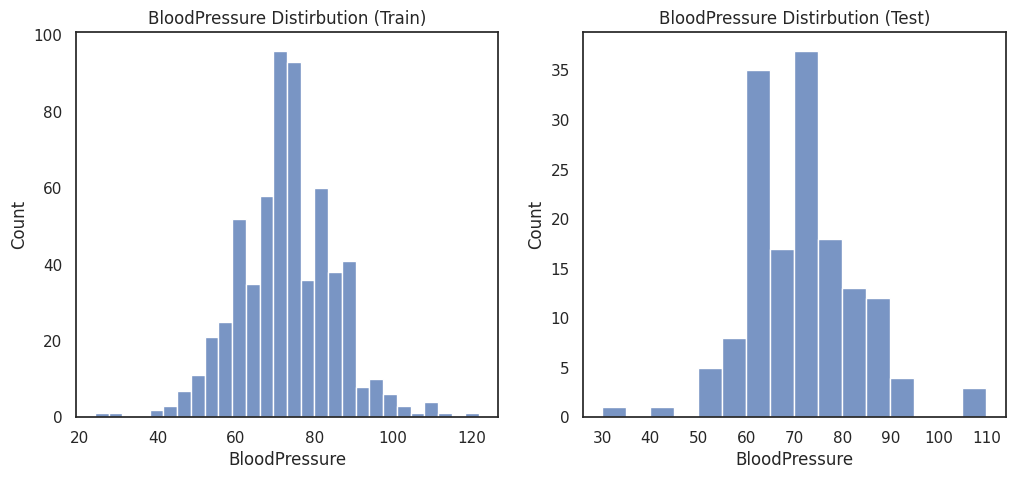

In [71]:
f, ax = plt.subplots(1,2, figsize = (12,5))
sns.histplot(x='BloodPressure', data = X_train, ax = ax[0])
ax[0].set_title('BloodPressure Distirbution (Train)')
sns.histplot(x='BloodPressure', data = X_test, ax = ax[1])
ax[1].set_title('BloodPressure Distirbution (Test)')

## **4.4 BMI**

As we saw above, BMI feature has 11 null values.

-> Fill 0 values using median values of each Outcome groups.

In [72]:
# Count of BMI feature == 0
print(f"Train data: {X_train[X_train['BMI']==0]['BMI'].count()}")
print(f"Test data: {X_test[X_test['BMI']==0]['BMI'].count()}")

Train data: 8
Test data: 3


In [73]:
# Median value of Outcome == 0
bmi_med_0 = int(X_train.loc[y_train[y_train==0].index,'BMI'].median())
# Median value of Outcome == 1
bmi_med_1 = int(X_train.loc[y_train[y_train==1].index,'BMI'].median())

In [74]:
# Change BMI values from 0 to median values (train data)
idx_null = y_train[X_train['BMI']==0].index

for k,v in y_train[X_train['BMI']==0].items():
    if v==0:
        X_train.loc[k,'BMI'] = bmi_med_0
    else:
        X_train.loc[k,'BMI'] = bmi_med_1

In [75]:
# Change BMI values from 0 to median values of train data (test data)
idx_null = y_test[X_test['BMI']==0].index

for k,v in y_test[X_test['BMI']==0].items():
    if v==0:
        X_test.loc[k,'BMI'] = bmi_med_0
    else:
        X_test.loc[k,'BMI'] = bmi_med_1

In [76]:
# Count of BMI feature == 0
print(f"Train data: {X_train[X_train['BMI']==0]['BMI'].count()}")
print(f"Test data: {X_test[X_test['BMI']==0]['BMI'].count()}")

Train data: 0
Test data: 0


Text(0.5, 1.0, 'BMI Distribution (Test)')

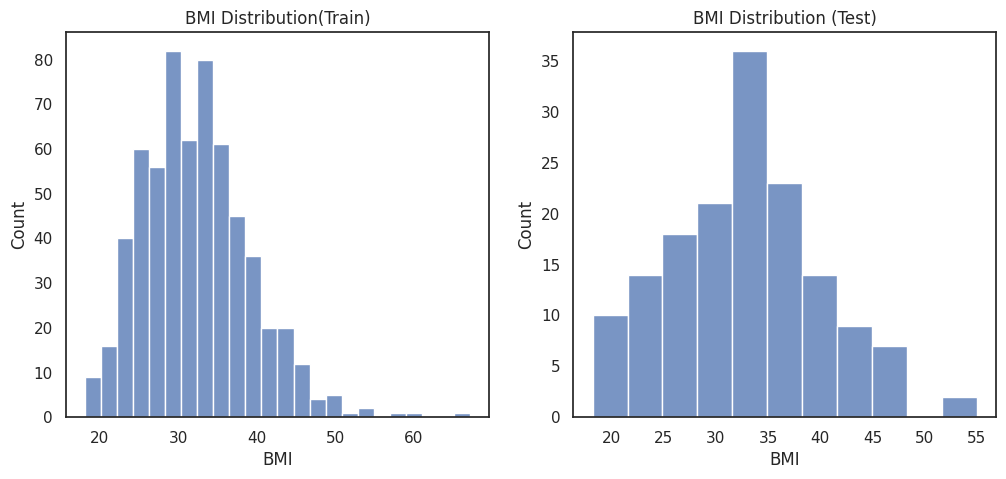

In [77]:
f, ax = plt.subplots(1,2, figsize = (12,5))
sns.histplot(x='BMI', data = X_train, ax = ax[0])
ax[0].set_title('BMI Distribution(Train)')
sns.histplot(x='BMI', data = X_test, ax = ax[1])
ax[1].set_title('BMI Distribution (Test)')

* Distribution of BMI is positively skewed distribution. To make model better, this distribution will be transform by log transformation.

In [78]:
# Apply log transformation
X_train['BMI_log'] = X_train['BMI'].map(lambda i : np.log(i)+1)
X_test['BMI_log'] = X_test['BMI'].map(lambda i : np.log(i)+1)

Text(0.5, 1.0, 'BMI_log Distribution (Test)')

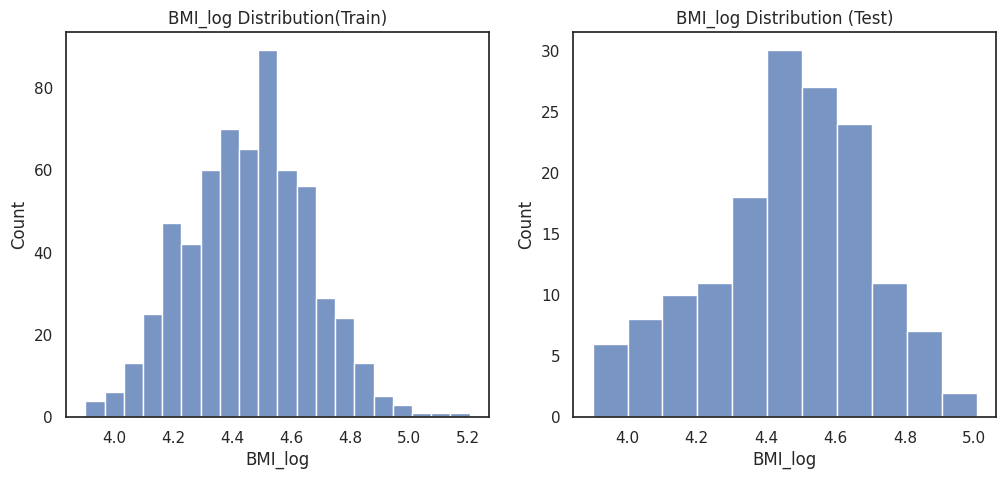

In [79]:
f, ax = plt.subplots(1,2, figsize = (12,5))
sns.histplot(x='BMI_log', data = X_train, ax = ax[0])
ax[0].set_title('BMI_log Distribution(Train)')
sns.histplot(x='BMI_log', data = X_test, ax = ax[1])
ax[1].set_title('BMI_log Distribution (Test)')

## **4.5 SkinThickness**

* As we saw above, SkinThickness feature has 227 null values.

* As we saw in relation between features section, SkinThickness feature is strongly related with BMI feature (correlation coef = 0.66). So null values of SkinThickness are going to fill by predicted values from linear regression using BMI values.

In [80]:
# Count of SkinThickness feature == 0
print(f"Train data: {X_train[X_train['SkinThickness']==0]['SkinThickness'].count()}")
print(f"Test data: {X_test[X_test['SkinThickness']==0]['SkinThickness'].count()}")

Train data: 188
Test data: 39


In [81]:
from sklearn.linear_model import LinearRegression

not_null_idx = X_train[X_train['SkinThickness'] != 0].index
X_train_2 = X_train.loc[not_null_idx].copy()
X_train_2_X = X_train_2[['BMI']]
X_train_2_y = X_train_2['SkinThickness']

# LinearRegression model fit
lr = LinearRegression()
lr.fit(X_train_2_X, X_train_2_y)

LinearRegression()

In [82]:
# Filling the predicted values (train data)
null_idx = X_train[X_train['SkinThickness'] == 0].index

for i in null_idx:
    X_train.loc[i,'SkinThickness'] = lr.predict(X_train.loc[i,['BMI']].values.reshape(-1,1))

In [83]:
# Filling the predicted values (test data)
null_idx = X_test[X_test['SkinThickness'] == 0].index

for i in null_idx:
    X_test.loc[i,'SkinThickness'] = lr.predict(X_test.loc[i,['BMI']].values.reshape(-1,1))

In [84]:
# Count of SkinThickness feature == 0
print(f"Train data: {X_train[X_train['SkinThickness']==0]['SkinThickness'].count()}")
print(f"Test data: {X_test[X_test['SkinThickness']==0]['SkinThickness'].count()}")

Train data: 0
Test data: 0


Text(0.5, 1.0, 'SkinThickness Distirbution (Test)')

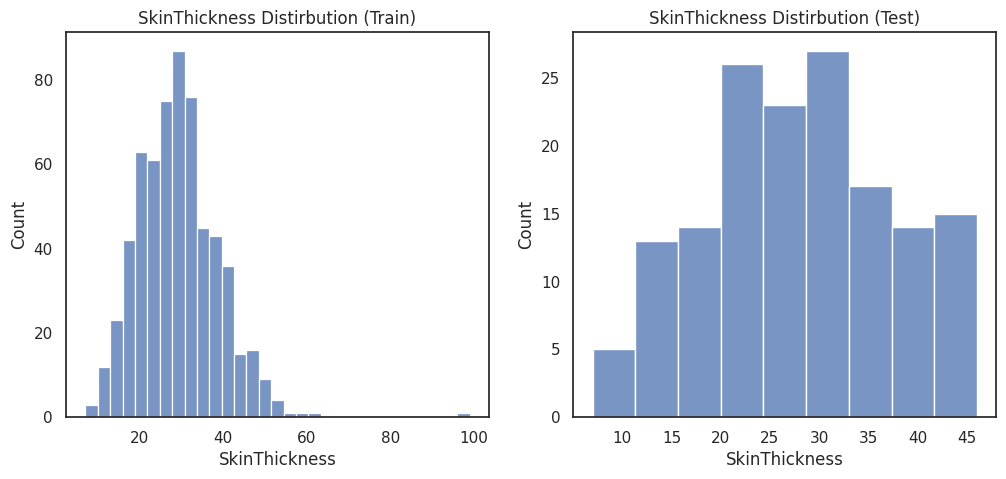

In [85]:
f, ax = plt.subplots(1,2, figsize = (12,5))
sns.histplot(x='SkinThickness', data = X_train, ax = ax[0])
ax[0].set_title('SkinThickness Distirbution (Train)')
sns.histplot(x='SkinThickness', data = X_test, ax = ax[1])
ax[1].set_title('SkinThickness Distirbution (Test)')

* About 100 of Skinthickness value might be outlier. So the values will be filled with median values.

In [86]:
idx = X_train[X_train['SkinThickness']>80].index
y_train[idx]

579    1
Name: Outcome, dtype: int64

In [87]:
# Median value of Outcome == 1
skin_med_1 = int(X_train.loc[y_train[y_train==1].index,'SkinThickness'].median())

X_train.loc[idx,'SkinThickness'] = skin_med_1

Text(0.5, 1.0, 'SkinThickness Distirbution(Test)')

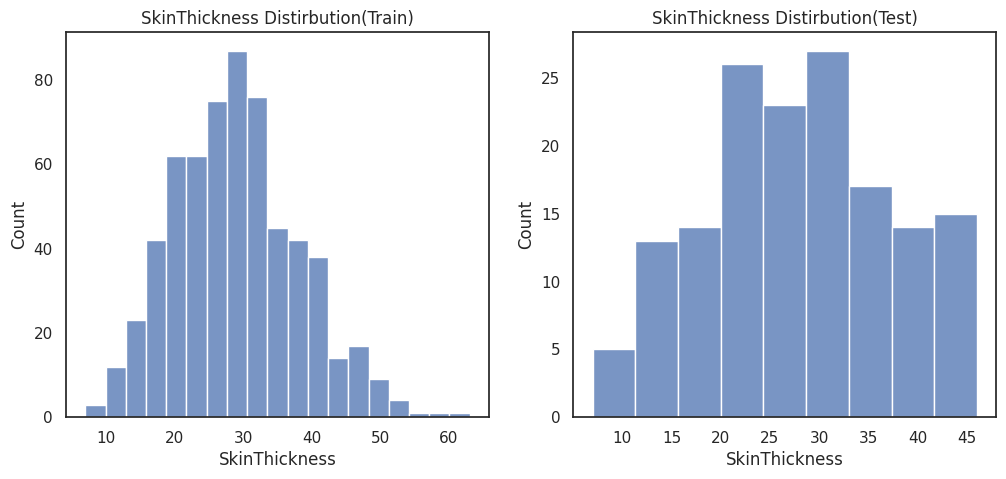

In [88]:
f, ax = plt.subplots(1,2, figsize = (12,5))
sns.histplot(x='SkinThickness', data = X_train, ax = ax[0])
ax[0].set_title('SkinThickness Distirbution(Train)')
sns.histplot(x='SkinThickness', data = X_test, ax = ax[1])
ax[1].set_title('SkinThickness Distirbution(Test)')

## **4.6 Insulin**

* As we saw above, Insulin feature has 375 null values.

* As we saw in relation between features section, Insulin feature is strongly related with Glucose feature (correlation coef = 0.58). So null values of Insulin are going to fill by predicted values from linear regression using Glucose values.

In [89]:
# Count of Insulin feature == 0
print(f"Train data: {X_train[X_train['Insulin']==0]['Insulin'].count()}")
print(f"Test data: {X_test[X_test['Insulin']==0]['Insulin'].count()}")

Train data: 316
Test data: 58


In [90]:
from sklearn.linear_model import LinearRegression

not_null_idx = X_train[X_train['Insulin'] != 0].index
X_train_2 = X_train.loc[not_null_idx].copy()
X_train_2_X = X_train_2[['Glucose']]
X_train_2_y = X_train_2['Insulin']

# LinearRegression model fit
lr = LinearRegression()
lr.fit(X_train_2_X, X_train_2_y)

LinearRegression()

In [91]:
# Filling the predicted values (train data)
null_idx = X_train[X_train['Insulin'] == 0].index

for i in null_idx:
    X_train.loc[i,'Insulin'] = lr.predict(X_train.loc[i,['Glucose']].values.reshape(-1,1))

In [92]:
# Filling the predicted values (test data)
null_idx = X_test[X_test['Insulin'] == 0].index

for i in null_idx:
    X_test.loc[i,'Insulin'] = lr.predict(X_test.loc[i,['Glucose']].values.reshape(-1,1))

In [93]:
# Count of Insulin feature == 0
print(f"Train data: {X_train[X_train['Insulin']==0]['Insulin'].count()}")
print(f"Test data: {X_test[X_test['Insulin']==0]['Insulin'].count()}")

Train data: 0
Test data: 0


Text(0.5, 1.0, 'Insulin Distirbution(Test)')

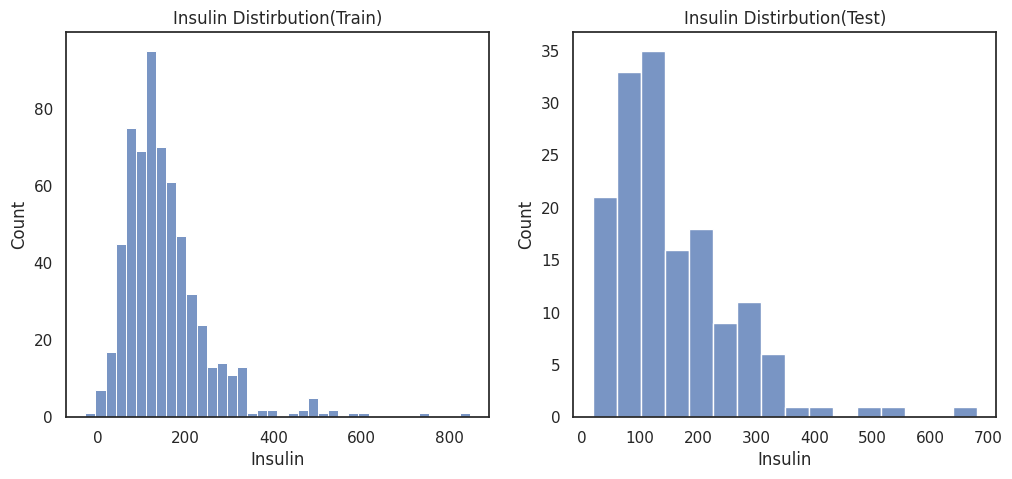

In [94]:
f, ax = plt.subplots(1,2, figsize = (12,5))
sns.histplot(x='Insulin', data = X_train, ax = ax[0])
ax[0].set_title('Insulin Distirbution(Train)')
sns.histplot(x='Insulin', data = X_test, ax = ax[1])
ax[1].set_title('Insulin Distirbution(Test)')

* Distribution of Insulin is positively skewed distribution. To make model better, this distribution will be transform by log transformation.

In [95]:
# Apply log transformation
X_train['Insulin_log'] = X_train['Insulin'].map(lambda i : np.log(i) if i > 0 else 0)
X_test['Insulin_log'] = X_test['Insulin'].map(lambda i : np.log(i) if i > 0 else 0)

Text(0.5, 1.0, 'Insulin_log Distirbution(Test)')

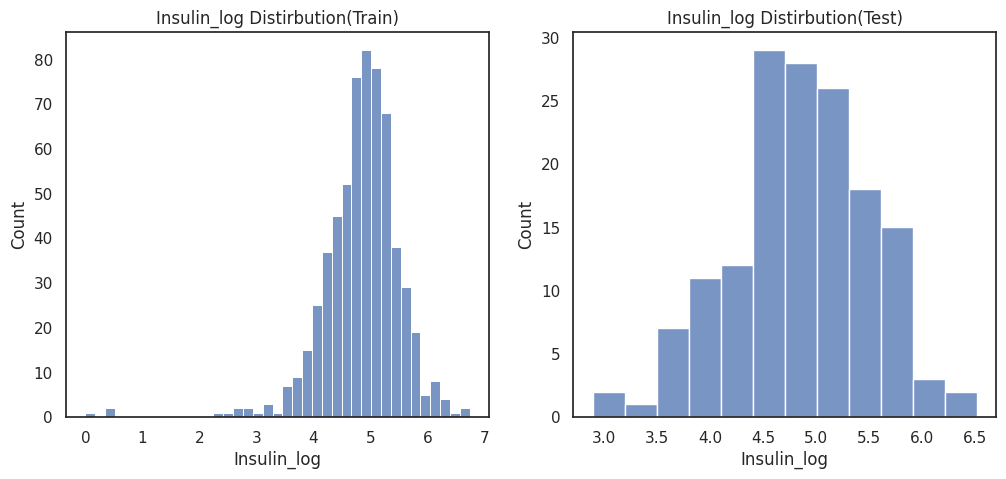

In [96]:
f, ax = plt.subplots(1,2, figsize = (12,5))
sns.histplot(x='Insulin_log', data = X_train, ax = ax[0])
ax[0].set_title('Insulin_log Distirbution(Train)')
sns.histplot(x='Insulin_log', data = X_test, ax = ax[1])
ax[1].set_title('Insulin_log Distirbution(Test)')

## **4.7 Drop unnecessary features**

In [97]:
X_train = X_train.drop(['Pregnancies', 'BMI', 'Insulin'], axis = 1)
X_test = X_test.drop(['Pregnancies', 'BMI', 'Insulin'], axis = 1)

In [98]:
X_train.head()

,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Pregnancies_cat,BMI_log,Insulin_log
22,196,90,36.681095,0.451,41,2,4.683867,5.784256
497,81,72,15.000000,0.547,25,0,4.404525,4.330733
395,127,58,24.000000,1.600,25,0,4.321432,5.616771
381,105,68,22.000000,0.236,22,0,3.995732,4.730720
258,193,50,16.000000,0.655,24,0,4.254243,5.926926


In [99]:
X_test.head()

,Glucose,BloodPressure,SkinThickness,DiabetesPedigreeFunction,Age,Pregnancies_cat,BMI_log,Insulin_log
680,56,56,28.0,0.332,22,0,4.186353,3.806662
607,92,62,25.0,0.482,25,0,3.970414,3.713572
639,100,74,12.0,0.149,28,0,3.970414,3.828641
638,97,76,32.0,0.871,32,2,4.711130,4.510860
295,151,62,31.0,0.692,28,1,4.569533,4.787492


# **5. Modeling**

## **5.1 Simple Modeling**

In [100]:
model_list = ['rbf-SVM','linear-SVM', 'LogisticRegression', 'DecisionTree','kNN', 'GaussianNB', 'RandomForest']
accuracy = []
f1 = []

### **5.1.1 Radial Support Vector Machine (rbf-SVM)**

In [101]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

model_rbfsvc = SVC(kernel='rbf', random_state = 0)
model_rbfsvc.fit(X_train, y_train)
pred = model_rbfsvc.predict(X_test)
print('Accuracy for rbf SVM is ', accuracy_score(y_test, pred))
print('f1_score for rbf SVM is ', f1_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
f1.append(f1_score(y_test, pred))

Accuracy for rbf SVM is  0.7792207792207793
f1_score for rbf SVM is  0.6304347826086957


### **5.1.2 Linear Supprot Vector Machine (linear-SVM)**

In [102]:
model_linsvc = SVC(kernel='linear',random_state = 0)
model_linsvc.fit(X_train, y_train)
pred = model_linsvc.predict(X_test)
print('Accuracy for linear SVM is ', accuracy_score(y_test, pred))
print('f1_score for linear SVM is ', f1_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
f1.append(f1_score(y_test, pred))

Accuracy for linear SVM is  0.7597402597402597
f1_score for linear SVM is  0.6105263157894738


### **5.1.3 LogisticRegression**

In [103]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state = 0)
model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)
print('Accuracy for LogisticRegression is ', accuracy_score(y_test, pred))
print('f1_score for LogisticRegression is ', f1_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
f1.append(f1_score(y_test, pred))

Accuracy for LogisticRegression is  0.7662337662337663
f1_score for LogisticRegression is  0.6326530612244898


### **5.1.4 DecisionTree**

In [104]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state = 0)
model_dt.fit(X_train, y_train)
pred = model_dt.predict(X_test)
print('Accuracy for DecisionTree is ', accuracy_score(y_test, pred))
print('f1_score for DecisionTree is ', f1_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
f1.append(f1_score(y_test, pred))

Accuracy for DecisionTree is  0.7012987012987013
f1_score for DecisionTree is  0.5660377358490566


### **5.1.5 k-Nearest Neighbours (kNN)**

In [105]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
pred = model_knn.predict(X_test)
print('Accuracy for kNN is ', accuracy_score(y_test, pred))
print('f1_score for kNN is ', f1_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
f1.append(f1_score(y_test, pred))

Accuracy for kNN is  0.7532467532467533
f1_score for kNN is  0.6415094339622641


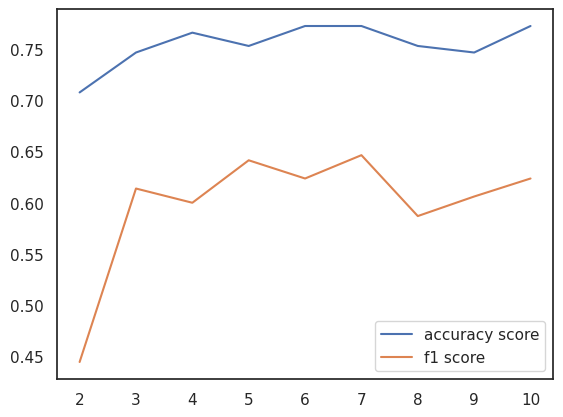

accuracy score: [0.7078, 0.7468, 0.7662, 0.7532, 0.7727, 0.7727, 0.7532, 0.7468, 0.7727]
f1 score: [0.4444, 0.6139, 0.6, 0.6415, 0.6237, 0.6465, 0.587, 0.6061, 0.6237]


In [106]:
acc_list = []
f1_list = []

for i in range(2,11):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc_list.append(round(accuracy_score(y_test, pred),4))
    f1_list.append(round(f1_score(y_test, pred),4))

x_list = list(range(2,11))
sns.lineplot(x=x_list, y=acc_list, label = 'accuracy score')
sns.lineplot(x=x_list, y=f1_list, label = 'f1 score')
plt.legend()
plt.xticks(x_list)
plt.show()
print(f'accuracy score: {acc_list}')
print(f'f1 score: {f1_list}')

* kNN with n_neighbors = 7 is the best model for accuracy score and f1 score.

### **5.1.6 Gaussian Naive-Bayes**


In [107]:
from sklearn.naive_bayes import GaussianNB
model_gnb=GaussianNB()
model_gnb.fit(X_train, y_train)
pred = model_gnb.predict(X_test)
print('Accuracy for Gaussian Naive-Bayes is ', accuracy_score(y_test, pred))
print('f1_score for Gaussian Naive-Bayes is ', f1_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
f1.append(f1_score(y_test, pred))

Accuracy for Gaussian Naive-Bayes is  0.7792207792207793
f1_score for Gaussian Naive-Bayes is  0.6792452830188679


### **5.1.7 Random Forest**

In [108]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
pred = model_rf.predict(X_test)
print('Accuracy for Random Forest is ', accuracy_score(y_test, pred))
print('f1_score for Random Forest is ', f1_score(y_test, pred))
accuracy.append(accuracy_score(y_test, pred))
f1.append(f1_score(y_test, pred))

Accuracy for Random Forest is  0.7857142857142857
f1_score for Random Forest is  0.6526315789473683


### **5.1.8 Summary**

In [109]:
simple_df = pd.DataFrame({"Model": model_list, "Accuracy score": accuracy, "f1 score": f1,})
simple_df

,Model,Accuracy score,f1 score
0,rbf-SVM,0.779221,0.630435
1,linear-SVM,0.759740,0.610526
2,LogisticRegression,0.766234,0.632653
3,DecisionTree,0.701299,0.566038
4,kNN,0.753247,0.641509
5,GaussianNB,0.779221,0.679245
6,RandomForest,0.785714,0.652632


* GaussinNB shows the best accuracy score and f1 score among simple models. But accuracy score and f1 score of GaussianNB are below 0.8. So hyperparameter tuning is required to get better performance of model.

## **5.2 Hyperparameter tuning**

In [110]:
from sklearn.model_selection import GridSearchCV

### **5.2.1 Support Vector Machine (SVM)**

In [111]:
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ['rbf', 'linear']
hyper={'kernel': kernel, 'C': C, 'gamma': gamma}
gcv_svm = GridSearchCV(estimator=SVC(random_state=0),param_grid=hyper, n_jobs = -1, verbose=True)
gcv_svm.fit(X_train,y_train)
print(gcv_svm.best_score_)
print(gcv_svm.best_estimator_)
best_svm = gcv_svm.best_estimator_

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.758989737438358
SVC(C=1, gamma=0.1, kernel='linear', random_state=0)


### **5.2.2 LogisticRegression**

In [112]:
penalty = ['l1', 'l2', 'elasticnet', None]
C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper={'penalty': penalty, 'C': C}
gcv_lr = GridSearchCV(estimator=LogisticRegression(random_state=0),param_grid=hyper, n_jobs = -1,verbose=True)
gcv_lr.fit(X_train,y_train)
print(gcv_lr.best_score_)
print(gcv_lr.best_estimator_)
best_lr = gcv_lr.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.7637878182060509
LogisticRegression(C=0.6, random_state=0)


### **5.2.3 DecisionTree**

In [113]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10]
max_features = ['sqrt','log2', None]
min_samples_split = [2,4,6,8,10]
hyper={'criterion': criterion, 'max_depth': max_depth, 'max_features': max_features, 'min_samples_split': min_samples_split}
gcv_dtc = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),param_grid=hyper, n_jobs = -1,verbose=True)
gcv_dtc.fit(X_train,y_train)
print(gcv_dtc.best_score_)
print(gcv_dtc.best_estimator_)
best_dtc = gcv_dtc.best_estimator_

Fitting 5 folds for each of 150 candidates, totalling 750 fits
0.7425962948154071
DecisionTreeClassifier(max_depth=8, max_features='log2', min_samples_split=10,
                       random_state=0)


### **5.2.4 Random Forest**

In [114]:
n_estimators = [100,200,300,400,500]
criterion = ['gini', 'entropy']
max_depth = [None, 2,5,10]
min_samples_split = [2,5,10]
hyper={'n_estimators': n_estimators, 'criterion': criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split}
gcv_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper, n_jobs = -1,verbose=True)
gcv_rf.fit(X_train,y_train)
print(gcv_rf.best_score_)
print(gcv_rf.best_estimator_)
best_rf = gcv_rf.best_estimator_

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.7670931627349059
RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=200, random_state=0)


### **5.2.5 Summary**

In [115]:
model_list = ['gcv_SVM', 'gcv_LogisticRegression', 'gcv_DecisionTree', 'gcv_RandomForest']
best_model = [best_svm, best_lr, best_dtc, best_rf]
accuracy = []
f1 = []

for model in best_model:
    pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))
    f1.append(f1_score(y_test, pred))

hypertune_df = pd.DataFrame({"Model": model_list, "Accuracy score": accuracy, "f1 score": f1,})
hypertune_df

,Model,Accuracy score,f1 score
0,gcv_SVM,0.759740,0.610526
1,gcv_LogisticRegression,0.772727,0.639175
2,gcv_DecisionTree,0.746753,0.597938
3,gcv_RandomForest,0.779221,0.645833


* Accuracy and f1 score of LogisticRegression, DecisionTree, and RandomForest model improved after parameter tuning by GridSearchCV.
* RandomForest shows the best accuracy score and f1 score among simple models, but f1 score of RandomForest is lower than simple GaussianNB.

## **5.3 Boosting Model**

### **5.3.1 AdaBoost**

In [116]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators = list(range(100,1100,100))
learning_rate=[0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hyper={'n_estimators': n_estimators, 'learning_rate': learning_rate}
gcv_ada = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, n_jobs = -1, verbose = True)
gcv_ada.fit(X_train,y_train)
print(gcv_ada.best_score_)
print(gcv_ada.best_estimator_)
best_ada = gcv_ada.best_estimator_

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.7605491136878583
AdaBoostClassifier(learning_rate=0.05, n_estimators=500)


### **5.3.2 GradientBoosting**

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
gcv_gb = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=hyper, n_jobs = -1, verbose = True)
gcv_gb.fit(X_train,y_train)
print(gcv_gb.best_score_)
print(gcv_gb.best_estimator_)
best_gb = gcv_gb.best_estimator_

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.7491669998667201
GradientBoostingClassifier(learning_rate=0.2)


### **5.3.3 xgboost**

In [124]:
from xgboost import XGBClassifier
gcv_xg = GridSearchCV(estimator=XGBClassifier(), param_grid=hyper, n_jobs = -1, verbose = True)
gcv_xg.fit(X_train,y_train)
print(gcv_xg.best_score_)
print(gcv_xg.best_estimator_)
best_xg = gcv_xg.best_estimator_

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.7540717046514727
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


### **5.3.4 Summary**

#### **5.3.4.1 Accuracy & f1 score**

In [125]:
model_list = ['AdaBoost', 'GradientBoosting', 'xgboost']
best_model = [best_ada, best_gb, best_xg]
accuracy = []
f1 = []

for model in best_model:
    pred = model.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))
    f1.append(f1_score(y_test, pred))

boost_df = pd.DataFrame({"Model": model_list, "Accuracy score": accuracy, "f1 score": f1,})
boost_df

,Model,Accuracy score,f1 score
0,AdaBoost,0.772727,0.646465
1,GradientBoosting,0.798701,0.699029
2,xgboost,0.785714,0.691589


#### **5.3.4.2 feature importance**

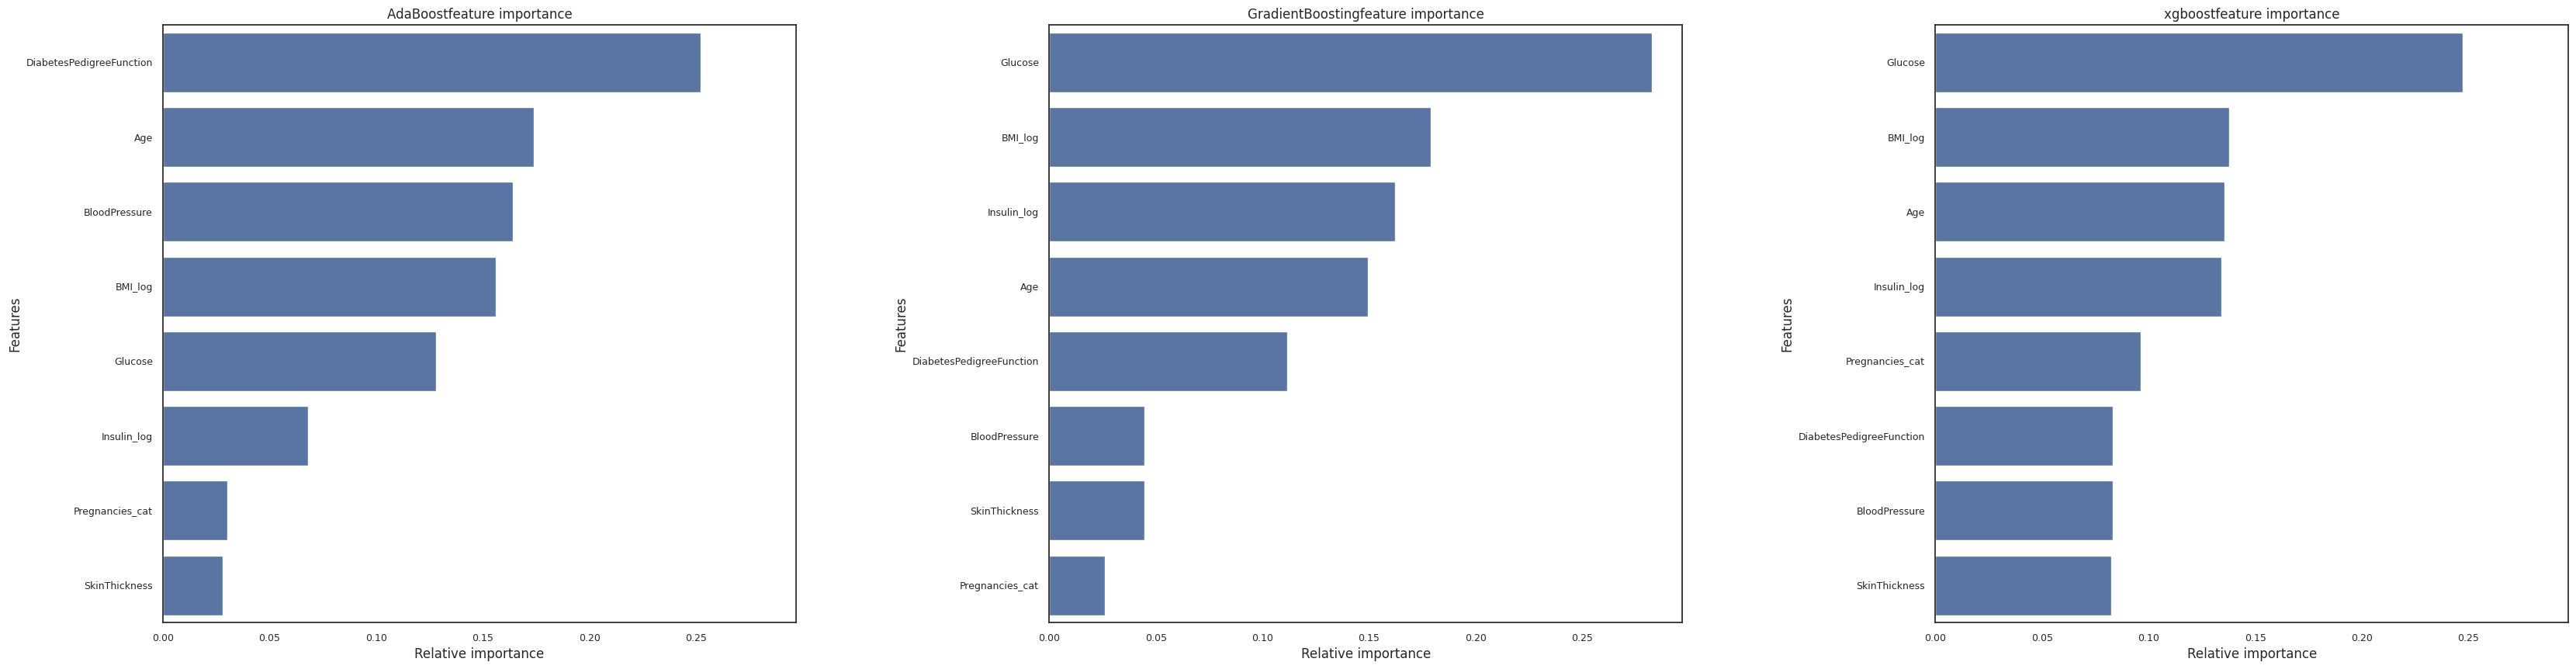

In [126]:
fig, axes = plt.subplots(1,3, sharex = 'all', figsize = (40,10))

names_classifiers = [("AdaBoost", best_ada),("GradientBoosting",best_gb),("xgboost",best_xg)]

for i in range(3):
    name = names_classifiers[i][0]
    classifier = names_classifiers[i][1]
    indices = np.argsort(classifier.feature_importances_)[::-1]
    g = sns.barplot(y=X_train.columns[indices][:40], x = classifier.feature_importances_[indices],
                    orient = 'h', ax = axes[i])
    g.set_xlabel('Relative importance', fontsize = 12)
    g.set_ylabel('Features', fontsize = 12)
    g.tick_params(labelsize=9)
    g.set_title(name + 'feature importance')

plt.subplots_adjust(wspace=0.4)
plt.show()

* In Boosting model section, XGBoost shows the best accuracy score and f1 score. And the scores are better than those of GaussianNB.
    
    (Accuracy Score: , f1 Score: )